In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('skup2.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,a
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,a
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,a
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,a
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,a


In [3]:
df.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,NaN
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,NaN
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,NaN
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,NaN
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,NaN
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,NaN


In [4]:
feature_names = df.columns.tolist()
X = df[feature_names[:-1]]
y = df[feature_names[-1]]

In [5]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names[:-1])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [7]:
params = {'criterion' : ['gini', 'entropy'],
          'splitter' : ['best', 'random'],
          'max_depth' : [None, 4, 6, 8, 10]
         }

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')

In [8]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [9]:
model = grid.best_estimator_
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [10]:
y_predicted = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_predicted)}\n')
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_predicted)}')

Accuracy: 0.6615384615384615

Confusion matrix:
 [[16  4  0  0  0  1]
 [ 3 17  1  0  2  0]
 [ 2  3  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 0  2  0  0  1  0]
 [ 1  0  0  0  0  8]]


In [11]:
pca = PCA(n_components=2)
pca.fit(X_test)
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=['pca_0', 'pca_1'])
X_test_pca['label'] = y_predicted

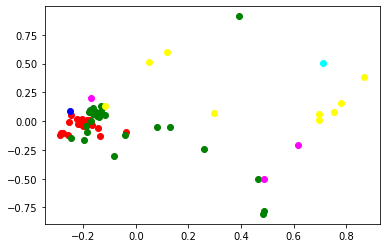

In [13]:
# znamo da imamo 6 klasa
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
possible_classes = ['a', 'b', 'c', 'd', 'e', 'f']

for i, possible_class in enumerate(possible_classes):
    instances = X_test_pca[X_test_pca['label'] == possible_class]
    plt.scatter(instances['pca_0'], instances['pca_1'], color=colors[i])

plt.show()

In [20]:
# deo sa KNN je prakticno iskopiran jer je sve isto sem grid search poziva

params = {'n_neighbors' : [3, 4, 5, 6, 7, 8],
          'weights' : ['uniform', 'distance'],
         }

grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy')

In [21]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
model = grid.best_estimator_
model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [28]:
y_predicted = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_predicted)}\n')
print(f'Confusion matrix:\n {confusion_matrix(y_test, y_predicted)}')

Accuracy: 0.6307692307692307

Confusion matrix:
 [[19  2  0  0  0  0]
 [ 6 14  0  3  0  0]
 [ 4  1  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 0  0  0  1  2  0]
 [ 1  2  0  0  1  5]]


In [31]:
pca = PCA(n_components=2)
pca.fit(X_test)
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=['pca_0', 'pca_1'])
X_test_pca['label'] = y_predicted

[0.39145294 0.24460519]


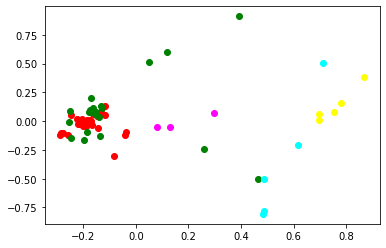

In [30]:
# znamo da imamo 6 klasa
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
possible_classes = ['a', 'b', 'c', 'd', 'e', 'f']

for i, possible_class in enumerate(possible_classes):
    instances = X_test_pca[X_test_pca['label'] == possible_class]
    plt.scatter(instances['pca_0'], instances['pca_1'], color=colors[i])

plt.show()